In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("asl_alphabet.png")
image_bgr = image[:,:,::-1]
image_rgb = image[:,:,::-1]
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

handCascade = cv2.CascadeClassifier('haar_models/hand.xml')
palmCascade = cv2.CascadeClassifier('haar_models/palm.xml')
closedPalmCascade = cv2.CascadeClassifier('haar_models/closed_frontal_palm.xml')
fistCascade = cv2.CascadeClassifier('haar_models/fist.xml')
randomCascade = cv2.CascadeClassifier('haar_models/Hand.Cascade.1.xml')

[INFO] Found 45 Hands!
[[ 234  212   65   65]
 [ 616   62  108  108]
 [ 372  100  102  102]
 [ 154   73   97   97]
 [1105   71  111  111]
 [ 620  328  126  126]
 [ 123  121   68   68]
 [ 374  198   70   70]
 [ 851  174  117  117]
 [ 625  309  389  389]
 [1124  152   82   82]
 [1389  211   79   79]
 [1595  116  118  118]
 [ 106   97  115  115]
 [1352  131  132  132]
 [ 664  382   71   71]
 [1024  128  270  270]
 [ 437  471   42   42]
 [ 465  194  278  278]
 [ 971  536   74   74]
 [1523  543   66   66]
 [1614  381   88   88]
 [ 641  327   88   88]
 [1732  438   63   63]
 [1397  413  115  115]
 [1092  395  128  128]
 [ 855  473  133  133]
 [1184  364  698  698]
 [ 114  615  128  128]
 [ 257  422   72   72]
 [1000  645  109  109]
 [1443  656  117  117]
 [  65  545  462  462]
 [ 267  694  430  430]
 [1009  732  444  444]
 [ 377  450  125  125]
 [ 993  596  342  342]
 [ 903  819   68   68]
 [1206  736   99   99]
 [ 760  931  105  105]
 [ 623 1004   83   83]
 [ 777  726  121  121]
 [ 889 1051

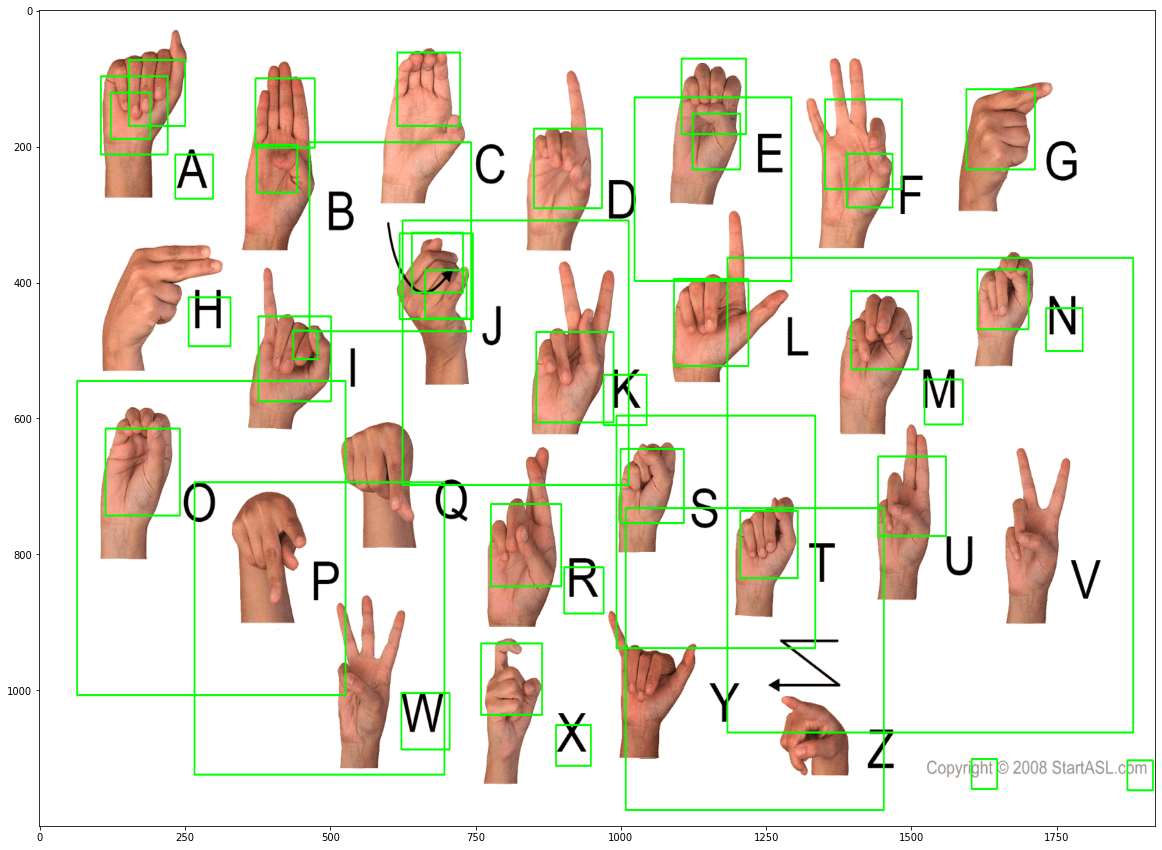

In [4]:
hands = palmCascade.detectMultiScale(image_gray, scaleFactor=1.03, minNeighbors=1, minSize=(40,40))
print("[INFO] Found {0} Hands!".format(len(hands)))
pad = 5
print(hands)

image_bgr = np.ascontiguousarray(image_rgb, dtype=np.uint8)

hands_processed = []

count = 0
for (x, y, w, h) in hands:
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    cv2.rectangle(image_bgr, (x,y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imwrite('curr_frame/{num}.jpeg'.format(num=count), image_bgr[y-pad+1:y+h+pad, x-pad+1:x+w+pad])
    count += 1
    
status = cv2.imwrite('hands_detected.jpg', image_bgr)

fig = plt.figure()
fig.set_size_inches(20,15)

plt.imshow(image_bgr, aspect="auto")

In [ ]:
video_capture = cv2.VideoCapture(0)

pad = 10

while True:
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    hands = handCascade.detectMultiScale(gray, scaleFactor=1.03, minNeighbors=1, minSize=(40,40))
    hands_processed = []

    i = 0
    for (x, y, w, h) in hands:
        cv2.imwrite('curr_frame/{num}.jpg'.format(num=i), frame[y-pad+1:y+h+pad, x-pad+1:x+w+pad])
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        i += 1

    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

[[[127 141 148]
  [133 139 145]
  [141 140 145]
  ...
  [ 78  68  59]
  [108 100  87]
  [134 127 113]]

 [[134 142 150]
  [137 141 147]
  [142 141 146]
  ...
  [ 81  71  60]
  [108 104  92]
  [133 130 117]]

 [[142 143 152]
  [143 142 149]
  [144 143 148]
  ...
  [ 85  73  62]
  [108 107  97]
  [132 132 121]]

 ...

 [[ 55  57  68]
  [ 55  56  67]
  [ 56  54  68]
  ...
  [130 117 134]
  [130 120 138]
  [132 122 140]]

 [[ 53  54  65]
  [ 54  52  64]
  [ 56  51  66]
  ...
  [131 117 136]
  [130 116 138]
  [127 113 135]]

 [[ 51  52  63]
  [ 52  50  62]
  [ 55  50  65]
  ...
  [133 119 138]
  [128 114 136]
  [122 108 130]]]
[[[129 138 143]
  [126 141 145]
  [124 142 146]
  ...
  [ 68  74  64]
  [ 89  91  80]
  [121 123 112]]

 [[134 140 146]
  [133 143 148]
  [129 144 148]
  ...
  [ 68  74  63]
  [ 91  96  82]
  [123 128 114]]

 [[138 142 148]
  [136 145 150]
  [135 145 150]
  ...
  [ 69  75  64]
  [ 96 101  87]
  [129 134 120]]

 ...

 [[ 76  61  67]
  [ 70  61  66]
  [ 61  57  63]
  ..

[[[132 137 146]
  [127 139 146]
  [123 141 147]
  ...
  [ 89  79  74]
  [ 96 102  96]
  [120 126 120]]

 [[131 139 147]
  [126 140 147]
  [125 143 149]
  ...
  [ 79  70  67]
  [ 92  97  93]
  [120 125 121]]

 [[131 138 148]
  [128 142 149]
  [127 145 151]
  ...
  [ 72  66  67]
  [ 91  94  95]
  [122 126 126]]

 ...

 [[ 59  58  68]
  [ 59  56  66]
  [ 60  54  65]
  ...
  [127 117 134]
  [124 119 135]
  [126 121 137]]

 [[ 55  56  66]
  [ 57  56  66]
  [ 60  57  67]
  ...
  [129 116 135]
  [127 116 135]
  [127 116 135]]

 [[ 53  54  64]
  [ 56  55  65]
  [ 60  57  67]
  ...
  [128 115 134]
  [125 114 133]
  [124 113 132]]]
[[[145 145 150]
  [134 143 147]
  [129 144 147]
  ...
  [ 54  63  55]
  [ 76  85  77]
  [109 118 110]]

 [[147 144 148]
  [140 143 146]
  [134 144 146]
  ...
  [ 55  63  53]
  [ 84  91  81]
  [117 124 114]]

 [[149 142 144]
  [142 142 143]
  [140 143 146]
  ...
  [ 55  58  49]
  [ 91  95  84]
  [124 128 117]]

 ...

 [[ 60  59  69]
  [ 53  58  67]
  [ 45  55  65]
  ..

[[[150 144 140]
  [139 143 143]
  [129 141 146]
  ...
  [ 85  65  65]
  [108  92  98]
  [135 119 125]]

 [[148 142 140]
  [142 142 143]
  [135 142 146]
  ...
  [ 76  63  61]
  [106  97 100]
  [133 125 127]]

 [[148 142 142]
  [144 142 143]
  [143 142 147]
  ...
  [ 71  62  59]
  [107 102 104]
  [131 126 128]]

 ...

 [[ 62  67  70]
  [ 62  66  69]
  [ 60  64  67]
  ...
  [119 117 134]
  [121 117 137]
  [125 120 140]]

 [[ 61  64  69]
  [ 60  63  68]
  [ 61  62  67]
  ...
  [117 113 133]
  [115 111 133]
  [117 113 135]]

 [[ 59  62  67]
  [ 58  61  66]
  [ 60  61  66]
  ...
  [113 109 129]
  [109 105 127]
  [108 104 126]]]
[[[136 129 144]
  [138 135 145]
  [144 142 149]
  ...
  [ 81  66  64]
  [114  95  92]
  [136 117 114]]

 [[137 130 145]
  [140 135 145]
  [144 139 147]
  ...
  [ 73  61  57]
  [106  96  89]
  [133 123 116]]

 [[138 131 146]
  [140 134 146]
  [145 137 148]
  ...
  [ 68  60  53]
  [102 100  90]
  [134 131 121]]

 ...

 [[ 55  51  69]
  [ 56  53  69]
  [ 56  53  69]
  ..

[[[125 143 149]
  [124 142 148]
  [124 140 147]
  ...
  [ 78  60  53]
  [ 98  81  71]
  [134 117 107]]

 [[130 142 149]
  [130 142 149]
  [130 142 149]
  ...
  [ 74  63  56]
  [103  93  86]
  [135 125 118]]

 [[135 140 149]
  [134 142 150]
  [134 142 150]
  ...
  [ 65  58  55]
  [106 102  98]
  [135 130 126]]

 ...

 [[ 64  55  68]
  [ 65  57  68]
  [ 66  59  67]
  ...
  [127 124 138]
  [128 127 142]
  [133 132 147]]

 [[ 63  54  67]
  [ 64  56  67]
  [ 64  57  65]
  ...
  [127 126 141]
  [124 124 141]
  [123 123 140]]

 [[ 63  54  67]
  [ 63  55  66]
  [ 63  56  64]
  ...
  [125 124 139]
  [121 121 138]
  [114 114 131]]]
[[[139 141 147]
  [135 141 147]
  [132 142 147]
  ...
  [ 73  70  66]
  [ 99  99  93]
  [125 125 119]]

 [[136 140 146]
  [134 140 146]
  [133 142 147]
  ...
  [ 66  70  65]
  [ 99 105  99]
  [126 132 126]]

 [[135 139 145]
  [136 140 146]
  [137 141 147]
  ...
  [ 59  66  62]
  [ 97 109 104]
  [126 138 133]]

 ...

 [[ 51  60  70]
  [ 54  58  69]
  [ 56  57  68]
  ..

[[[139 138 145]
  [140 139 146]
  [140 138 148]
  ...
  [ 75  69  64]
  [ 98  99  90]
  [121 122 113]]

 [[134 138 144]
  [135 139 145]
  [135 138 147]
  ...
  [ 71  65  60]
  [ 92  92  86]
  [125 125 119]]

 [[131 137 143]
  [130 139 144]
  [131 139 147]
  ...
  [ 65  59  54]
  [ 88  87  84]
  [129 128 125]]

 ...

 [[ 60  60  74]
  [ 62  58  70]
  [ 64  55  68]
  ...
  [130 130 141]
  [133 135 146]
  [134 136 147]]

 [[ 56  57  71]
  [ 59  57  71]
  [ 62  55  70]
  ...
  [130 128 139]
  [129 129 140]
  [127 127 138]]

 [[ 53  54  68]
  [ 57  55  69]
  [ 62  55  70]
  ...
  [127 125 136]
  [123 123 134]
  [121 121 132]]]
[[[135 145 150]
  [136 143 147]
  [138 140 145]
  ...
  [ 61  60  57]
  [ 87  87  82]
  [121 121 116]]

 [[131 143 148]
  [134 143 147]
  [135 142 146]
  ...
  [ 63  62  59]
  [ 96  96  91]
  [127 127 122]]

 [[131 143 148]
  [133 144 147]
  [134 143 147]
  ...
  [ 68  64  62]
  [107 104 100]
  [131 128 124]]

 ...

 [[ 68  61  69]
  [ 68  61  69]
  [ 67  60  68]
  ..

[[[143 141 142]
  [140 141 144]
  [137 141 147]
  ...
  [ 74  70  68]
  [100  94  90]
  [127 121 117]]

 [[144 142 143]
  [139 142 145]
  [133 142 147]
  ...
  [ 74  70  66]
  [ 96  92  88]
  [133 128 124]]

 [[147 142 144]
  [138 143 146]
  [130 142 147]
  ...
  [ 73  66  63]
  [ 93  89  85]
  [139 134 130]]

 ...

 [[ 62  56  74]
  [ 59  56  72]
  [ 56  56  70]
  ...
  [129 120 135]
  [130 123 138]
  [133 126 141]]

 [[ 58  54  72]
  [ 56  55  71]
  [ 55  56  71]
  ...
  [127 117 134]
  [126 118 136]
  [126 118 136]]

 [[ 55  51  69]
  [ 53  52  68]
  [ 54  55  70]
  ...
  [126 116 133]
  [124 116 134]
  [124 116 134]]]
[[[132 138 151]
  [127 138 147]
  [121 136 145]
  ...
  [ 62  72  66]
  [ 79  91  93]
  [110 121 123]]

 [[138 140 151]
  [133 141 149]
  [128 140 147]
  ...
  [ 59  64  57]
  [ 84  95  93]
  [119 130 128]]

 [[144 142 152]
  [139 142 151]
  [136 141 150]
  ...
  [ 61  60  50]
  [ 94 101  97]
  [130 137 133]]

 ...

 [[ 56  61  70]
  [ 56  60  66]
  [ 56  56  63]
  ..

[[[128 143 147]
  [124 145 147]
  [121 148 149]
  ...
  [ 66  76  70]
  [ 80 100  94]
  [107 127 121]]

 [[134 143 148]
  [131 144 147]
  [127 146 148]
  ...
  [ 77  82  75]
  [ 94 109 100]
  [120 135 126]]

 [[141 140 147]
  [138 142 148]
  [135 144 149]
  ...
  [ 84  83  73]
  [105 112 102]
  [128 135 125]]

 ...

 [[ 53  52  68]
  [ 57  52  67]
  [ 62  54  65]
  ...
  [128 115 132]
  [132 118 137]
  [135 121 140]]

 [[ 49  54  70]
  [ 53  54  68]
  [ 58  54  66]
  ...
  [131 114 134]
  [135 115 138]
  [135 115 138]]

 [[ 48  53  69]
  [ 52  53  67]
  [ 58  54  66]
  ...
  [130 113 133]
  [130 110 133]
  [128 108 131]]]
[[[130 140 145]
  [134 143 148]
  [140 146 152]
  ...
  [ 77  69  64]
  [112 105 103]
  [141 134 132]]

 [[134 140 146]
  [137 141 147]
  [141 143 149]
  ...
  [ 78  69  66]
  [ 95  92  89]
  [140 137 134]]

 [[141 139 149]
  [140 138 148]
  [141 138 148]
  ...
  [ 77  70  68]
  [ 87  85  85]
  [140 138 138]]

 ...

 [[ 49  57  73]
  [ 49  57  71]
  [ 48  53  68]
  ..

[[[143 139 151]
  [131 142 151]
  [118 142 149]
  ...
  [ 70  72  61]
  [ 92 100  88]
  [115 123 111]]

 [[144 139 149]
  [136 141 150]
  [129 143 150]
  ...
  [ 71  71  58]
  [101 105  94]
  [127 131 120]]

 [[146 138 149]
  [144 141 151]
  [141 142 151]
  ...
  [ 72  68  56]
  [107 106  96]
  [134 134 123]]

 ...

 [[ 67  52  66]
  [ 65  50  64]
  [ 65  48  62]
  ...
  [116 118 129]
  [122 125 134]
  [127 130 139]]

 [[ 69  52  66]
  [ 67  50  64]
  [ 65  48  62]
  ...
  [116 121 131]
  [119 124 133]
  [121 126 135]]

 [[ 69  52  66]
  [ 68  51  65]
  [ 67  50  64]
  ...
  [115 120 130]
  [114 119 128]
  [114 119 128]]]
[[[146 141 151]
  [145 142 152]
  [144 141 151]
  ...
  [ 86  76  71]
  [ 92  99  89]
  [118 125 115]]

 [[140 141 150]
  [141 142 151]
  [142 143 152]
  ...
  [ 78  71  63]
  [ 95 104  94]
  [127 137 126]]

 [[135 140 149]
  [137 143 151]
  [139 145 153]
  ...
  [ 67  64  56]
  [ 98 107  97]
  [132 142 131]]

 ...

 [[ 60  61  66]
  [ 58  59  63]
  [ 55  56  60]
  ..

[[[137 139 150]
  [124 139 148]
  [114 139 146]
  ...
  [ 70  67  71]
  [ 84  87  90]
  [119 122 125]]

 [[131 139 147]
  [126 140 147]
  [120 140 146]
  ...
  [ 69  62  67]
  [ 95  92  94]
  [126 124 125]]

 [[128 137 145]
  [127 139 146]
  [128 140 147]
  ...
  [ 71  60  63]
  [111 100 103]
  [135 124 127]]

 ...

 [[ 62  58  64]
  [ 61  57  63]
  [ 64  58  64]
  ...
  [129 118 133]
  [133 117 135]
  [134 118 136]]

 [[ 62  61  65]
  [ 62  59  63]
  [ 63  57  62]
  ...
  [130 119 134]
  [133 118 134]
  [133 118 134]]

 [[ 65  64  68]
  [ 63  60  64]
  [ 62  56  61]
  ...
  [130 119 134]
  [131 116 132]
  [130 115 131]]]
[[[127 134 148]
  [130 138 150]
  [133 139 152]
  ...
  [ 58  64  63]
  [ 95  98  97]
  [125 127 126]]

 [[129 135 149]
  [132 138 151]
  [136 141 151]
  ...
  [ 59  65  61]
  [ 98 102  97]
  [122 126 121]]

 [[134 135 150]
  [137 139 152]
  [138 140 151]
  ...
  [ 63  69  65]
  [102 107 100]
  [125 129 122]]

 ...

 [[ 62  62  69]
  [ 63  63  70]
  [ 65  63  70]
  ..

[[[138 142 148]
  [131 140 145]
  [124 136 141]
  ...
  [ 77  66  62]
  [ 92  93  90]
  [122 123 120]]

 [[142 141 148]
  [136 140 146]
  [133 139 145]
  ...
  [ 77  70  62]
  [ 94 100  94]
  [125 131 125]]

 [[144 139 147]
  [143 141 148]
  [142 141 148]
  ...
  [ 73  68  60]
  [ 95 104  96]
  [125 134 126]]

 ...

 [[ 57  57  64]
  [ 56  56  63]
  [ 58  56  62]
  ...
  [118 108 125]
  [127 115 132]
  [135 123 140]]

 [[ 51  59  65]
  [ 51  58  62]
  [ 53  57  62]
  ...
  [119 113 125]
  [122 114 126]
  [125 117 129]]

 [[ 52  60  66]
  [ 52  59  63]
  [ 53  57  62]
  ...
  [121 115 127]
  [122 114 126]
  [122 114 126]]]
[[[135 137 148]
  [132 143 152]
  [125 144 152]
  ...
  [ 83  79  67]
  [102 101  87]
  [131 130 115]]

 [[136 137 146]
  [133 142 150]
  [129 145 152]
  ...
  [ 77  77  64]
  [102 105  90]
  [134 137 122]]

 [[137 136 143]
  [136 142 148]
  [134 146 151]
  ...
  [ 73  75  64]
  [100 107  93]
  [136 142 128]]

 ...

 [[ 70  63  68]
  [ 69  63  68]
  [ 69  63  69]
  ..

[[[129 148 150]
  [123 144 146]
  [122 143 145]
  ...
  [ 70  68  68]
  [ 83  86  85]
  [115 118 117]]

 [[131 149 151]
  [127 146 148]
  [126 145 147]
  ...
  [ 64  57  54]
  [ 91  88  84]
  [131 128 124]]

 [[132 147 151]
  [128 145 149]
  [127 144 148]
  ...
  [ 55  44  37]
  [ 98  88  81]
  [140 130 123]]

 ...

 [[ 65  59  70]
  [ 59  55  67]
  [ 55  50  65]
  ...
  [122 118 132]
  [126 122 136]
  [132 128 142]]

 [[ 57  55  69]
  [ 54  51  67]
  [ 50  46  64]
  ...
  [121 117 131]
  [123 119 133]
  [127 123 137]]

 [[ 53  51  65]
  [ 51  48  64]
  [ 49  45  63]
  ...
  [119 115 129]
  [119 115 129]
  [122 118 132]]]
[[[136 147 156]
  [132 143 152]
  [129 140 149]
  ...
  [ 64  71  67]
  [ 89  95  95]
  [123 129 129]]

 [[136 144 154]
  [133 141 151]
  [132 140 150]
  ...
  [ 69  68  64]
  [ 97 101 100]
  [128 132 131]]

 [[135 141 154]
  [134 140 153]
  [134 140 153]
  ...
  [ 73  64  61]
  [106 109 108]
  [135 137 136]]

 ...

 [[ 68  54  66]
  [ 68  54  66]
  [ 68  54  66]
  ..

[[[123 138 149]
  [120 135 146]
  [122 134 147]
  ...
  [ 84  69  61]
  [114  94  84]
  [140 119 109]]

 [[128 136 146]
  [127 135 145]
  [129 135 148]
  ...
  [ 84  68  62]
  [114  99  91]
  [142 127 119]]

 [[133 136 145]
  [133 136 145]
  [138 138 149]
  ...
  [ 84  65  62]
  [112  99  95]
  [142 129 125]]

 ...

 [[ 67  58  71]
  [ 62  56  68]
  [ 61  55  66]
  ...
  [128 123 133]
  [133 126 134]
  [134 127 135]]

 [[ 62  55  70]
  [ 58  54  66]
  [ 58  54  66]
  ...
  [130 122 133]
  [133 122 131]
  [134 123 132]]

 [[ 59  52  67]
  [ 56  52  64]
  [ 57  53  65]
  ...
  [127 119 130]
  [131 120 129]
  [132 121 130]]]
[[[144 144 149]
  [129 144 147]
  [114 143 145]
  ...
  [ 68  70  59]
  [ 93  93  80]
  [127 127 114]]

 [[146 142 148]
  [134 143 147]
  [124 142 146]
  ...
  [ 70  74  63]
  [104 103  93]
  [132 132 121]]

 [[148 139 147]
  [141 140 147]
  [136 142 148]
  ...
  [ 67  70  61]
  [111 107  99]
  [133 129 121]]

 ...

 [[ 67  60  65]
  [ 66  59  64]
  [ 67  60  65]
  ..

[[[138 136 146]
  [141 139 149]
  [142 140 150]
  ...
  [ 71  66  64]
  [101  94  92]
  [134 127 125]]

 [[140 138 148]
  [142 140 150]
  [143 141 151]
  ...
  [ 70  66  66]
  [ 92  88  88]
  [135 131 131]]

 [[142 138 150]
  [144 140 152]
  [145 141 153]
  ...
  [ 68  62  67]
  [ 82  81  85]
  [135 134 138]]

 ...

 [[ 64  59  67]
  [ 66  59  67]
  [ 67  58  67]
  ...
  [126 119 134]
  [130 120 137]
  [133 123 140]]

 [[ 65  61  67]
  [ 66  60  66]
  [ 65  57  64]
  ...
  [124 119 135]
  [127 119 137]
  [129 121 139]]

 [[ 65  61  67]
  [ 65  59  65]
  [ 64  56  63]
  ...
  [124 119 135]
  [127 119 137]
  [129 121 139]]]
[[[135 137 148]
  [132 137 147]
  [130 137 147]
  ...
  [ 68  67  54]
  [ 94  91  77]
  [128 125 111]]

 [[135 137 148]
  [132 137 147]
  [130 137 147]
  ...
  [ 70  66  54]
  [101  98  84]
  [138 135 121]]

 [[137 137 148]
  [132 137 147]
  [131 138 148]
  ...
  [ 68  60  48]
  [105 100  86]
  [144 139 125]]

 ...

 [[ 59  54  69]
  [ 59  54  69]
  [ 59  54  69]
  ..

[[[137 135 142]
  [133 139 145]
  [130 142 147]
  ...
  [ 75  63  62]
  [ 98  92  93]
  [130 124 124]]

 [[135 137 143]
  [133 139 145]
  [131 141 146]
  ...
  [ 67  60  58]
  [ 98  96  96]
  [131 129 129]]

 [[134 137 146]
  [133 138 147]
  [132 140 148]
  ...
  [ 56  52  50]
  [ 95  96  95]
  [132 133 132]]

 ...

 [[ 56  57  72]
  [ 57  58  68]
  [ 59  60  65]
  ...
  [129 120 135]
  [131 124 139]
  [135 128 143]]

 [[ 55  54  70]
  [ 56  55  65]
  [ 59  57  63]
  ...
  [128 118 135]
  [126 119 135]
  [126 119 135]]

 [[ 52  51  67]
  [ 54  53  63]
  [ 57  55  61]
  ...
  [126 116 133]
  [120 113 129]
  [115 108 124]]]
[[[137 134 148]
  [138 138 149]
  [141 141 152]
  ...
  [ 77  80  65]
  [110 106  90]
  [131 127 111]]

 [[139 137 148]
  [139 139 150]
  [140 143 152]
  ...
  [ 67  69  56]
  [113 111  98]
  [134 132 119]]

 [[141 137 149]
  [140 141 150]
  [140 143 152]
  ...
  [ 60  59  50]
  [109 110 101]
  [133 134 125]]

 ...

 [[ 71  59  66]
  [ 69  60  65]
  [ 67  60  65]
  ..

[[[138 141 150]
  [131 140 148]
  [122 137 146]
  ...
  [ 84  69  61]
  [117 103  91]
  [146 133 120]]

 [[137 141 147]
  [131 140 145]
  [124 138 145]
  ...
  [ 77  70  62]
  [108 104  92]
  [137 134 121]]

 [[139 141 146]
  [133 140 144]
  [128 138 143]
  ...
  [ 70  68  62]
  [101 105  94]
  [133 137 126]]

 ...

 [[ 65  61  67]
  [ 67  59  66]
  [ 70  57  66]
  ...
  [126 121 137]
  [131 124 139]
  [133 126 141]]

 [[ 64  60  66]
  [ 66  58  65]
  [ 72  56  66]
  ...
  [127 122 138]
  [126 121 137]
  [125 120 136]]

 [[ 65  61  67]
  [ 67  59  66]
  [ 74  58  68]
  ...
  [126 121 137]
  [123 118 134]
  [120 115 131]]]
[[[130 139 147]
  [137 142 146]
  [148 145 149]
  ...
  [ 77  69  64]
  [103  97  92]
  [131 125 120]]

 [[129 139 144]
  [137 142 146]
  [145 144 148]
  ...
  [ 66  68  63]
  [ 93  99  93]
  [127 133 127]]

 [[131 140 145]
  [137 142 146]
  [143 143 148]
  ...
  [ 53  62  58]
  [ 78  93  90]
  [121 136 133]]

 ...

 [[ 52  54  71]
  [ 44  52  68]
  [ 39  53  66]
  ..

[[[132 140 150]
  [131 138 148]
  [133 135 146]
  ...
  [ 88  79  66]
  [114 115  94]
  [134 135 114]]

 [[135 143 151]
  [136 141 150]
  [137 140 149]
  ...
  [ 79  70  57]
  [106 107  88]
  [136 136 117]]

 [[139 145 151]
  [139 145 151]
  [139 143 149]
  ...
  [ 73  61  50]
  [ 99  98  84]
  [140 139 124]]

 ...

 [[ 64  56  67]
  [ 61  56  64]
  [ 55  55  62]
  ...
  [126 120 132]
  [129 125 137]
  [134 130 142]]

 [[ 61  52  63]
  [ 59  54  62]
  [ 57  54  62]
  ...
  [125 119 131]
  [127 121 133]
  [130 124 136]]

 [[ 59  50  61]
  [ 58  53  61]
  [ 59  57  64]
  ...
  [126 120 132]
  [126 120 132]
  [128 122 134]]]
[[[135 146 149]
  [133 146 149]
  [132 145 148]
  ...
  [ 83  66  63]
  [104  94  87]
  [135 125 118]]

 [[135 144 148]
  [134 145 148]
  [133 146 149]
  ...
  [ 86  73  65]
  [104 103  90]
  [132 130 117]]

 [[137 141 147]
  [134 143 148]
  [135 145 150]
  ...
  [ 85  77  64]
  [104 108  91]
  [129 133 116]]

 ...

 [[ 62  58  70]
  [ 62  59  69]
  [ 63  61  68]
  ..

[[[132 138 144]
  [140 139 146]
  [149 139 150]
  ...
  [ 71  67  63]
  [ 91  90  87]
  [133 132 129]]

 [[137 142 146]
  [141 143 148]
  [145 143 150]
  ...
  [ 69  66  62]
  [ 86  91  87]
  [130 135 131]]

 [[141 144 147]
  [142 145 148]
  [143 145 150]
  ...
  [ 64  63  59]
  [ 80  91  89]
  [122 133 131]]

 ...

 [[ 62  53  66]
  [ 57  51  62]
  [ 56  50  61]
  ...
  [127 114 131]
  [133 120 137]
  [139 126 143]]

 [[ 60  54  65]
  [ 56  53  63]
  [ 56  53  63]
  ...
  [128 113 129]
  [133 116 132]
  [135 118 134]]

 [[ 63  57  68]
  [ 60  57  67]
  [ 59  56  66]
  ...
  [125 110 126]
  [129 112 128]
  [128 111 127]]]
[[[129 146 150]
  [127 141 148]
  [127 135 145]
  ...
  [ 74  71  65]
  [104  99  91]
  [128 123 115]]

 [[136 143 147]
  [133 139 145]
  [133 135 146]
  ...
  [ 75  69  64]
  [105 102  94]
  [132 128 120]]

 [[145 141 147]
  [141 139 146]
  [140 136 148]
  ...
  [ 77  69  64]
  [110 106  98]
  [137 133 125]]

 ...

 [[ 66  60  71]
  [ 65  59  70]
  [ 64  58  69]
  ..

[[[121 136 149]
  [122 139 147]
  [124 142 148]
  ...
  [ 74  71  67]
  [ 84  90  84]
  [119 125 119]]

 [[125 140 151]
  [128 141 150]
  [130 142 147]
  ...
  [ 77  76  66]
  [ 90 100  88]
  [121 131 119]]

 [[133 143 155]
  [134 143 151]
  [137 143 149]
  ...
  [ 76  77  62]
  [ 96 108  90]
  [123 135 117]]

 ...

 [[ 73  68  70]
  [ 68  62  67]
  [ 63  54  63]
  ...
  [134 118 130]
  [135 122 131]
  [138 125 134]]

 [[ 72  66  67]
  [ 69  63  65]
  [ 67  57  64]
  ...
  [136 118 130]
  [135 120 129]
  [137 122 131]]

 [[ 69  63  64]
  [ 68  62  64]
  [ 68  58  65]
  ...
  [134 116 128]
  [133 118 127]
  [135 120 129]]]
[[[114 138 145]
  [113 138 145]
  [113 137 147]
  ...
  [ 69  65  60]
  [ 96  91  83]
  [130 125 117]]

 [[124 140 147]
  [123 140 148]
  [121 140 148]
  ...
  [ 60  60  54]
  [ 90  89  80]
  [131 130 121]]

 [[137 143 151]
  [134 143 151]
  [131 142 151]
  ...
  [ 56  58  53]
  [ 89  92  85]
  [133 136 129]]

 ...

 [[ 50  55  64]
  [ 51  54  63]
  [ 55  55  62]
  ..

[[[141 143 148]
  [133 144 147]
  [126 144 148]
  ...
  [ 77  74  70]
  [ 99  92  90]
  [134 127 125]]

 [[143 142 149]
  [134 143 148]
  [129 144 148]
  ...
  [ 66  65  61]
  [ 96  93  90]
  [133 130 127]]

 [[144 141 151]
  [139 142 151]
  [133 142 150]
  ...
  [ 54  53  50]
  [ 93  92  89]
  [131 130 127]]

 ...

 [[ 62  55  70]
  [ 64  58  69]
  [ 69  62  70]
  ...
  [123 121 135]
  [127 125 136]
  [128 126 137]]

 [[ 64  56  63]
  [ 65  57  64]
  [ 67  59  66]
  ...
  [126 125 140]
  [126 125 139]
  [124 123 137]]

 [[ 63  55  62]
  [ 63  55  62]
  [ 64  56  63]
  ...
  [126 125 140]
  [124 123 137]
  [119 118 132]]]
[[[140 140 145]
  [141 136 144]
  [144 134 145]
  ...
  [ 78  71  62]
  [107 103  91]
  [134 131 118]]

 [[136 141 145]
  [136 138 144]
  [138 135 145]
  ...
  [ 74  67  58]
  [105 104  91]
  [136 134 121]]

 [[132 141 145]
  [133 139 145]
  [134 137 146]
  ...
  [ 75  68  59]
  [108 107  97]
  [137 137 126]]

 ...

 [[ 54  49  65]
  [ 54  49  64]
  [ 54  50  62]
  ..

[[[142 138 144]
  [138 138 143]
  [133 137 143]
  ...
  [ 75  67  62]
  [103  99  99]
  [125 121 121]]

 [[144 140 146]
  [140 140 145]
  [135 139 145]
  ...
  [ 73  62  58]
  [103  99  95]
  [130 125 121]]

 [[147 143 149]
  [143 143 148]
  [138 142 148]
  ...
  [ 72  60  56]
  [109 102  94]
  [139 132 124]]

 ...

 [[ 58  57  67]
  [ 56  54  66]
  [ 57  53  65]
  ...
  [127 126 133]
  [123 125 136]
  [125 127 138]]

 [[ 58  55  65]
  [ 58  55  65]
  [ 60  54  66]
  ...
  [126 124 134]
  [119 121 134]
  [121 123 136]]

 [[ 57  54  64]
  [ 58  55  65]
  [ 61  55  67]
  ...
  [123 122 132]
  [116 118 131]
  [119 121 134]]]
[[[139 147 155]
  [136 146 151]
  [133 145 150]
  ...
  [ 82  72  71]
  [111  95  95]
  [144 129 128]]

 [[134 144 149]
  [132 144 149]
  [130 145 149]
  ...
  [ 74  73  70]
  [101  96  94]
  [139 133 131]]

 [[130 140 145]
  [127 142 146]
  [127 144 148]
  ...
  [ 66  71  67]
  [ 90  94  90]
  [129 132 128]]

 ...

 [[ 47  66  70]
  [ 48  64  71]
  [ 49  59  69]
  ..

[[[126 142 150]
  [130 142 149]
  [135 141 147]
  ...
  [ 66  69  60]
  [ 93  89  89]
  [130 126 126]]

 [[132 141 149]
  [134 143 148]
  [139 143 149]
  ...
  [ 68  71  62]
  [ 88  86  86]
  [125 123 123]]

 [[137 140 149]
  [139 143 149]
  [143 145 151]
  ...
  [ 68  69  60]
  [ 85  85  85]
  [129 130 129]]

 ...

 [[ 76  59  69]
  [ 71  58  67]
  [ 65  56  67]
  ...
  [131 119 132]
  [136 122 135]
  [138 124 137]]

 [[ 75  56  65]
  [ 71  56  64]
  [ 66  55  64]
  ...
  [134 119 135]
  [137 116 135]
  [137 116 135]]

 [[ 71  52  61]
  [ 69  54  62]
  [ 65  54  63]
  ...
  [134 119 135]
  [135 114 133]
  [134 113 132]]]
[[[146 134 147]
  [146 136 147]
  [146 138 149]
  ...
  [ 84  62  61]
  [103  89  85]
  [131 117 113]]

 [[141 135 147]
  [141 137 149]
  [142 140 150]
  ...
  [ 84  68  62]
  [105  99  87]
  [133 127 115]]

 [[139 136 150]
  [138 138 149]
  [138 140 151]
  ...
  [ 78  70  58]
  [105 105  89]
  [135 134 118]]

 ...

 [[ 64  54  67]
  [ 63  54  67]
  [ 64  55  68]
  ..

[[[136 138 149]
  [136 141 151]
  [137 142 152]
  ...
  [ 81  71  64]
  [102  93  84]
  [133 124 115]]

 [[139 140 149]
  [141 142 151]
  [142 143 152]
  ...
  [ 76  68  63]
  [100  95  87]
  [137 132 124]]

 [[143 140 150]
  [144 141 151]
  [145 142 152]
  ...
  [ 70  66  62]
  [102  99  93]
  [139 135 129]]

 ...

 [[ 66  60  71]
  [ 63  60  70]
  [ 60  56  68]
  ...
  [119 119 136]
  [122 122 141]
  [125 125 144]]

 [[ 59  56  66]
  [ 59  56  66]
  [ 59  55  67]
  ...
  [119 116 132]
  [121 118 135]
  [125 121 138]]

 [[ 55  52  62]
  [ 56  53  63]
  [ 58  54  66]
  ...
  [116 113 129]
  [118 115 132]
  [120 117 134]]]
[[[140 138 139]
  [141 141 142]
  [144 143 147]
  ...
  [ 77  73  63]
  [ 97  93  81]
  [136 133 120]]

 [[143 140 144]
  [143 142 147]
  [144 143 148]
  ...
  [ 70  69  60]
  [ 99  98  88]
  [138 138 127]]

 [[146 141 149]
  [146 141 149]
  [146 141 151]
  ...
  [ 57  59  53]
  [ 97  98  89]
  [135 136 127]]

 ...

 [[ 68  62  68]
  [ 64  61  65]
  [ 62  59  63]
  ..

[[[145 140 150]
  [144 142 152]
  [141 144 153]
  ...
  [ 87  69  63]
  [107  91  85]
  [140 124 118]]

 [[143 138 146]
  [143 141 148]
  [142 144 150]
  ...
  [ 79  68  61]
  [102  99  91]
  [136 132 124]]

 [[144 137 145]
  [144 139 147]
  [144 142 149]
  ...
  [ 65  59  54]
  [ 98 104  97]
  [126 132 125]]

 ...

 [[ 62  55  70]
  [ 64  55  70]
  [ 64  55  70]
  ...
  [126 120 138]
  [129 123 141]
  [131 125 143]]

 [[ 59  52  67]
  [ 61  54  69]
  [ 64  55  70]
  ...
  [126 121 141]
  [128 121 142]
  [129 122 143]]

 [[ 57  50  65]
  [ 60  53  68]
  [ 65  56  71]
  ...
  [123 119 139]
  [124 117 138]
  [125 118 139]]]
[[[123 137 150]
  [125 137 149]
  [127 138 147]
  ...
  [ 65  62  64]
  [ 96  95  92]
  [129 128 125]]

 [[124 136 148]
  [127 138 147]
  [130 139 147]
  ...
  [ 54  57  56]
  [ 87  94  90]
  [125 132 128]]

 [[125 135 147]
  [130 138 148]
  [133 141 149]
  ...
  [ 47  53  52]
  [ 81  96  93]
  [123 138 135]]

 ...

 [[ 63  67  70]
  [ 63  64  68]
  [ 61  62  67]
  ..

[[[144 138 144]
  [142 142 147]
  [139 146 150]
  ...
  [ 58  74  63]
  [ 84 100  87]
  [117 133 120]]

 [[140 139 144]
  [140 142 147]
  [141 146 150]
  ...
  [ 52  58  47]
  [ 81  88  74]
  [132 138 124]]

 [[136 138 144]
  [139 141 147]
  [145 144 151]
  ...
  [ 51  49  39]
  [ 88  84  72]
  [146 143 130]]

 ...

 [[ 54  57  66]
  [ 55  54  64]
  [ 61  53  64]
  ...
  [133 123 134]
  [136 123 139]
  [141 128 144]]

 [[ 52  57  66]
  [ 53  54  64]
  [ 58  52  64]
  ...
  [134 123 132]
  [137 123 136]
  [138 124 137]]

 [[ 52  57  66]
  [ 52  53  63]
  [ 57  51  63]
  ...
  [133 122 131]
  [134 120 133]
  [131 117 130]]]
[[[147 127 140]
  [144 130 142]
  [143 135 146]
  ...
  [ 62  72  66]
  [ 93  90  86]
  [130 127 123]]

 [[143 133 144]
  [140 135 145]
  [140 137 147]
  ...
  [ 64  67  58]
  [ 96  93  85]
  [137 133 125]]

 [[140 138 148]
  [138 139 148]
  [138 139 148]
  ...
  [ 73  67  55]
  [106 100  88]
  [145 139 127]]

 ...

 [[ 62  51  68]
  [ 65  50  66]
  [ 68  49  66]
  ..

[[[124 147 144]
  [129 149 149]
  [133 148 151]
  ...
  [ 58  75  66]
  [ 87 101  94]
  [110 124 117]]

 [[127 142 145]
  [128 146 148]
  [130 147 151]
  ...
  [ 53  68  61]
  [ 83 101  95]
  [113 131 125]]

 [[130 138 146]
  [128 142 149]
  [127 144 152]
  ...
  [ 38  48  42]
  [ 79  98  96]
  [115 134 132]]

 ...

 [[ 65  56  69]
  [ 66  57  66]
  [ 67  57  64]
  ...
  [124 116 127]
  [126 118 130]
  [129 121 133]]

 [[ 65  56  67]
  [ 66  55  64]
  [ 68  56  63]
  ...
  [125 118 126]
  [125 117 128]
  [127 119 130]]

 [[ 64  55  66]
  [ 66  55  64]
  [ 67  54  62]
  ...
  [127 120 128]
  [125 117 128]
  [126 118 129]]]
[[[120 140 146]
  [122 140 144]
  [126 143 147]
  ...
  [ 81  66  64]
  [101  84  88]
  [135 118 122]]

 [[130 142 147]
  [129 141 146]
  [133 144 147]
  ...
  [ 72  65  62]
  [ 99  94  96]
  [134 129 131]]

 [[140 144 150]
  [139 144 148]
  [140 145 149]
  ...
  [ 56  57  54]
  [ 90  95  98]
  [123 128 131]]

 ...

 [[ 51  59  73]
  [ 52  55  70]
  [ 52  52  66]
  ..

[[[134 142 144]
  [134 142 144]
  [135 140 144]
  ...
  [ 83  71  67]
  [ 94  93  84]
  [129 128 119]]

 [[137 142 145]
  [137 142 145]
  [137 142 146]
  ...
  [ 69  62  59]
  [ 93  93  87]
  [132 132 126]]

 [[138 141 144]
  [138 143 146]
  [139 144 148]
  ...
  [ 48  47  44]
  [ 90  89  86]
  [132 131 128]]

 ...

 [[ 66  57  62]
  [ 64  55  60]
  [ 63  54  59]
  ...
  [122 125 134]
  [121 129 137]
  [124 132 140]]

 [[ 63  54  59]
  [ 63  54  59]
  [ 63  54  59]
  ...
  [119 124 134]
  [116 124 134]
  [117 125 135]]

 [[ 63  54  59]
  [ 64  55  60]
  [ 66  57  62]
  ...
  [115 120 130]
  [112 120 130]
  [113 121 131]]]
[[[137 139 152]
  [135 139 152]
  [135 139 152]
  ...
  [ 72  60  59]
  [ 96  86  85]
  [135 126 124]]

 [[140 141 150]
  [138 141 150]
  [137 139 150]
  ...
  [ 63  56  54]
  [ 95  90  88]
  [135 129 127]]

 [[143 142 149]
  [140 142 148]
  [139 140 149]
  ...
  [ 55  51  49]
  [ 96  95  92]
  [132 131 128]]

 ...

 [[ 71  60  69]
  [ 68  62  68]
  [ 66  62  68]
  ..

[[[141 139 150]
  [139 137 148]
  [139 135 149]
  ...
  [ 60  66  62]
  [ 71  86  83]
  [105 120 117]]

 [[144 142 152]
  [143 141 151]
  [141 139 149]
  ...
  [ 60  63  60]
  [ 79  93  90]
  [118 131 128]]

 [[147 145 152]
  [145 144 151]
  [144 143 150]
  ...
  [ 58  58  58]
  [ 88  96  96]
  [125 133 133]]

 ...

 [[ 77  69  70]
  [ 72  66  68]
  [ 68  62  67]
  ...
  [129 119 130]
  [136 126 137]
  [138 128 139]]

 [[ 74  67  65]
  [ 69  63  64]
  [ 65  60  62]
  ...
  [130 119 130]
  [134 123 134]
  [134 123 134]]

 [[ 71  64  62]
  [ 66  60  61]
  [ 62  57  59]
  ...
  [127 116 127]
  [129 118 129]
  [128 117 128]]]
[[[129 147 141]
  [132 148 142]
  [136 147 145]
  ...
  [ 79  69  62]
  [ 99  89  84]
  [136 126 121]]

 [[134 145 143]
  [137 146 144]
  [139 145 145]
  ...
  [ 73  66  57]
  [ 95  91  81]
  [136 132 122]]

 [[142 143 144]
  [143 144 145]
  [143 144 147]
  ...
  [ 67  61  49]
  [ 92  92  79]
  [137 137 124]]

 ...

 [[ 68  59  68]
  [ 68  59  68]
  [ 68  61  69]
  ..

[[[146 146 151]
  [142 147 151]
  [139 145 151]
  ...
  [ 72  75  66]
  [ 93 104  96]
  [115 126 118]]

 [[145 144 149]
  [142 144 150]
  [141 145 151]
  ...
  [ 70  71  62]
  [ 97 106  98]
  [124 133 125]]

 [[145 140 148]
  [144 142 149]
  [144 142 152]
  ...
  [ 69  68  59]
  [101 106  99]
  [134 138 131]]

 ...

 [[ 69  64  72]
  [ 67  61  72]
  [ 66  60  72]
  ...
  [123 122 136]
  [127 126 140]
  [130 129 143]]

 [[ 68  61  69]
  [ 65  57  68]
  [ 64  55  68]
  ...
  [122 121 135]
  [121 123 136]
  [122 124 137]]

 [[ 66  59  67]
  [ 63  55  66]
  [ 62  53  66]
  ...
  [118 117 131]
  [115 117 130]
  [114 116 129]]]
[[[149 140 148]
  [148 141 149]
  [148 141 149]
  ...
  [ 78  67  60]
  [ 98  96  86]
  [131 128 118]]

 [[147 140 148]
  [147 143 150]
  [147 143 150]
  ...
  [ 75  68  60]
  [106 102  92]
  [139 135 125]]

 [[145 140 148]
  [147 143 150]
  [147 143 150]
  ...
  [ 72  69  61]
  [112 105  96]
  [141 134 125]]

 ...

 [[ 59  61  72]
  [ 57  59  70]
  [ 56  57  68]
  ..

[[[146 144 154]
  [146 144 151]
  [148 141 149]
  ...
  [ 85  70  68]
  [104  91  94]
  [136 123 126]]

 [[142 143 152]
  [145 143 153]
  [145 142 152]
  ...
  [ 70  58  54]
  [ 98  90  91]
  [137 129 130]]

 [[139 139 150]
  [141 141 152]
  [145 143 154]
  ...
  [ 56  44  40]
  [ 97  94  91]
  [140 137 134]]

 ...

 [[ 71  58  61]
  [ 69  57  63]
  [ 68  55  64]
  ...
  [123 119 133]
  [129 125 139]
  [134 130 144]]

 [[ 69  54  58]
  [ 68  54  60]
  [ 68  52  62]
  ...
  [118 115 132]
  [123 118 134]
  [126 121 137]]

 [[ 66  51  55]
  [ 66  52  58]
  [ 67  51  61]
  ...
  [112 108 126]
  [113 108 124]
  [112 107 123]]]
[[[143 142 147]
  [141 143 149]
  [138 144 152]
  ...
  [ 59  53  58]
  [ 92  89  86]
  [125 122 119]]

 [[138 142 148]
  [137 143 149]
  [135 143 151]
  ...
  [ 55  53  53]
  [ 80  82  77]
  [125 127 122]]

 [[133 142 150]
  [133 142 150]
  [135 143 151]
  ...
  [ 55  56  53]
  [ 75  81  75]
  [126 132 126]]

 ...

 [[ 56  59  68]
  [ 60  59  69]
  [ 64  58  69]
  ..

[[[149 139 146]
  [147 141 147]
  [146 141 149]
  ...
  [ 74  63  66]
  [107  89  97]
  [140 122 130]]

 [[148 142 148]
  [147 143 149]
  [145 143 150]
  ...
  [ 75  62  64]
  [106  90  94]
  [139 124 127]]

 [[144 143 148]
  [143 143 148]
  [143 142 149]
  ...
  [ 80  65  63]
  [108  95  97]
  [139 127 128]]

 ...

 [[ 57  61  66]
  [ 58  62  65]
  [ 61  62  66]
  ...
  [122 118 138]
  [127 122 142]
  [131 126 146]]

 [[ 55  59  62]
  [ 59  60  64]
  [ 62  61  65]
  ...
  [122 115 137]
  [122 117 139]
  [125 119 141]]

 [[ 54  58  61]
  [ 58  59  63]
  [ 62  61  65]
  ...
  [119 112 134]
  [116 111 133]
  [116 111 133]]]
[[[133 141 153]
  [130 140 152]
  [129 139 151]
  ...
  [ 67  70  69]
  [ 93  97  93]
  [120 124 120]]

 [[134 142 150]
  [130 142 149]
  [127 140 149]
  ...
  [ 64  67  66]
  [ 96 101  97]
  [130 135 131]]

 [[138 142 148]
  [132 142 147]
  [126 142 149]
  ...
  [ 56  59  58]
  [ 95 100  96]
  [133 138 134]]

 ...

 [[ 65  66  70]
  [ 60  64  67]
  [ 57  62  65]
  ..

[[[138 145 149]
  [140 145 149]
  [143 143 148]
  ...
  [ 77  75  65]
  [ 97 102  88]
  [130 135 121]]

 [[136 145 149]
  [140 145 149]
  [142 142 147]
  ...
  [ 72  64  52]
  [ 98  97  83]
  [138 137 122]]

 [[135 144 149]
  [138 142 148]
  [141 140 147]
  ...
  [ 68  54  42]
  [104  95  80]
  [151 142 127]]

 ...

 [[ 63  65  66]
  [ 66  63  65]
  [ 69  60  65]
  ...
  [129 124 132]
  [130 125 133]
  [131 126 134]]

 [[ 58  60  61]
  [ 61  58  60]
  [ 66  57  62]
  ...
  [129 122 130]
  [130 121 129]
  [129 120 128]]

 [[ 53  55  56]
  [ 57  54  56]
  [ 64  55  60]
  ...
  [127 120 128]
  [126 117 125]
  [124 115 123]]]
[[[123 136 151]
  [128 137 151]
  [135 138 153]
  ...
  [ 62  66  67]
  [ 73  91  92]
  [107 125 126]]

 [[130 136 149]
  [134 139 149]
  [138 140 151]
  ...
  [ 69  72  69]
  [ 83  98  95]
  [116 131 128]]

 [[139 137 147]
  [139 141 147]
  [141 143 149]
  ...
  [ 71  73  68]
  [ 95 107 102]
  [124 136 131]]

 ...

 [[ 64  58  64]
  [ 64  58  64]
  [ 63  57  63]
  ..

[[[125 134 148]
  [122 137 148]
  [124 140 151]
  ...
  [ 78  77  68]
  [106 102  90]
  [130 127 114]]

 [[131 136 146]
  [130 138 148]
  [130 141 150]
  ...
  [ 72  77  70]
  [100 104  93]
  [128 132 121]]

 [[139 137 147]
  [138 139 148]
  [139 142 151]
  ...
  [ 59  72  65]
  [ 92 101  93]
  [123 132 124]]

 ...

 [[ 58  61  66]
  [ 61  62  67]
  [ 64  62  69]
  ...
  [131 123 135]
  [134 126 137]
  [135 127 138]]

 [[ 55  57  64]
  [ 58  58  65]
  [ 61  59  66]
  ...
  [134 123 136]
  [131 123 135]
  [131 123 135]]

 [[ 55  57  64]
  [ 57  57  64]
  [ 60  58  65]
  ...
  [133 122 135]
  [128 120 132]
  [127 119 131]]]
[[[140 130 141]
  [144 135 143]
  [149 140 148]
  ...
  [ 70  74  69]
  [ 87  97  92]
  [113 123 118]]

 [[138 137 144]
  [140 139 146]
  [143 143 148]
  ...
  [ 76  68  63]
  [ 95  97  92]
  [126 128 123]]

 [[135 144 149]
  [135 144 148]
  [137 144 148]
  ...
  [ 85  64  59]
  [107 101  96]
  [142 136 131]]

 ...

 [[ 62  55  70]
  [ 60  54  66]
  [ 59  53  65]
  ..

[[[128 136 144]
  [129 141 148]
  [126 142 149]
  ...
  [ 67  66  62]
  [ 89  90  87]
  [122 123 120]]

 [[133 134 143]
  [133 138 147]
  [131 140 148]
  ...
  [ 62  63  60]
  [ 90  93  92]
  [122 125 124]]

 [[137 132 142]
  [138 136 146]
  [139 140 149]
  ...
  [ 55  55  56]
  [ 92  95  98]
  [121 124 127]]

 ...

 [[ 64  64  64]
  [ 66  61  63]
  [ 68  56  62]
  ...
  [120 118 135]
  [123 123 140]
  [127 127 144]]

 [[ 67  64  60]
  [ 65  59  60]
  [ 65  53  59]
  ...
  [120 117 137]
  [121 121 140]
  [123 123 142]]

 [[ 65  62  58]
  [ 62  56  57]
  [ 62  50  56]
  ...
  [117 114 134]
  [116 115 135]
  [116 115 135]]]
[[[139 141 147]
  [140 141 144]
  [145 143 144]
  ...
  [ 68  56  55]
  [ 88  82  83]
  [125 119 119]]

 [[140 139 146]
  [140 139 144]
  [144 141 145]
  ...
  [ 73  59  55]
  [ 78  75  69]
  [131 127 121]]

 [[139 137 144]
  [141 137 143]
  [144 138 144]
  ...
  [ 80  65  57]
  [ 78  74  64]
  [141 137 127]]

 ...

 [[ 63  63  70]
  [ 64  62  69]
  [ 66  61  69]
  ..